# Book Publishing

Working in publishing is a tough profession. In this analysis, we will analyse the self-reported salaries of people who work at different levels within the publishing industry in the UK. We will see if there are any important patterns that determine a person's salary and also try to develop a model that we can use to predict salary based on a selected set of features.

## Summary of Findings

## About the Data

## Imports & Data Reading

In [1]:
# Imports
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
ukpub = pd.read_csv("data/Book Publishing Salary Transparency (UK) - Form responses 1.csv")

## Data Checking

In [3]:
ukpub.head()

,Timestamp,Job Title,Employer,Location,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Pubishing,Years of Overall Experience,Additional Compensation,Additional Information,Unnamed: 13,Unnamed: 14
0,17/06/2020 10:42:08,Marketing manager,Penguin Random House,London,£36k,Full-time,White,Woman (cisgender),Straight,3,9,Annual bonus,NaN,NaN,NaN
1,17/06/2020 10:45:51,Early careere coordinator,Penguin random house,London,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2,Can't remember,NaN,NaN,NaN
2,17/06/2020 10:51:09,Audience and Digital Development Assistant,Penguin random house,London,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4,1% increase after 7 months in line with the re...,I worked in publishing 2016-17. After leaving ...,NaN,NaN
3,17/06/2020 10:58:25,Publicity Officer,Penguin Random House,80 Strand,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6,"Annual bonus of approx £500, all expenses paid...",This role was my first and only role in publis...,NaN,NaN
4,17/06/2020 11:03:40,Creative art worker,Pan Macmillan Publishing,London,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10,0,I was pregnant,NaN,NaN


In [4]:
ukpub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    1018 non-null   object
 1   Job Title                    1020 non-null   object
 2   Employer                     1021 non-null   object
 3   Location                     975 non-null    object
 4   Salary                       1021 non-null   object
 5   Employment Status            1021 non-null   object
 6   Race / Ethnicity             1011 non-null   object
 7   Gender Identity              1020 non-null   object
 8   Sexual Orientation           1008 non-null   object
 9   Years in Pubishing           1008 non-null   object
 10  Years of Overall Experience  986 non-null    object
 11  Additional Compensation      900 non-null    object
 12  Additional Information       420 non-null    object
 13  Unnamed: 13                  7 no

We can see here that the type of all columns is object including our dependent variable (Salary). We will deal with those during data cleaning.

In [5]:
ukpub.shape

(1021, 15)

In [6]:
ukpub.columns

Index(['Timestamp', 'Job Title', 'Employer', 'Location', 'Salary',
       'Employment Status', 'Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Pubishing',
       'Years of Overall Experience', 'Additional Compensation',
       'Additional Information', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

## Data Cleaning

In [7]:
# Rename misspelling in column name
ukpub.rename(columns={'Years in Pubishing':'Years in Publishing'}, inplace=True)

In [8]:
# Extract columns that we will be working with
cols = ['Job Title', 'Salary', 'Employment Status','Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Publishing']
ukpub = ukpub.loc[:, cols]

In [9]:
# Check missing values
ukpub.isnull().sum()

Job Title               1
Salary                  0
Employment Status       0
Race / Ethnicity       10
Gender Identity         1
Sexual Orientation     13
Years in Publishing    13
dtype: int64

In [10]:
# Missing values as a percentage of total data
round(ukpub.isnull().sum()/ukpub.shape[0]*100,2)

Job Title              0.10
Salary                 0.00
Employment Status      0.00
Race / Ethnicity       0.98
Gender Identity        0.10
Sexual Orientation     1.27
Years in Publishing    1.27
dtype: float64

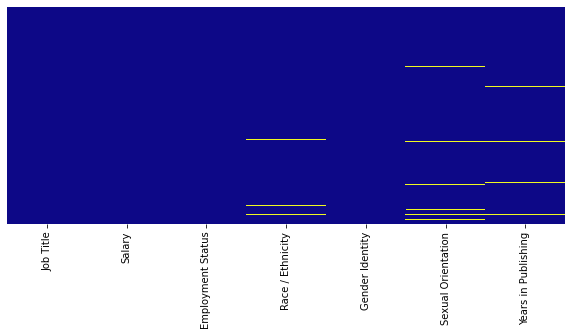

In [11]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(ukpub.isnull(),yticklabels=False,cbar=False,cmap='plasma')

That's good. It looks like we do not have much missing data in our dataset.

#### Years in Publishing Column

In [12]:
# Check value counts for years in publishing
ukpub['Years in Publishing'].value_counts(dropna=False)

3              150
4              141
5              126
2              118
7               75
6               67
1               61
Less than 1     53
8               52
10              34
9               25
12              22
11              20
15              13
NaN             13
14              12
13              10
20               8
16               5
18               4
19               3
24               2
21               2
26               1
17               1
Queer            1
25               1
27               1
Name: Years in Publishing, dtype: int64

In [13]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
ukpub.loc[ukpub['Years in Publishing'] == 'Less than 1', 'Years in Publishing'] = 0

In [14]:
# Convert 'Years in Publishing' to numeric data type
ukpub['Years in Publishing'] = pd.to_numeric(ukpub['Years in Publishing'], errors='coerce')

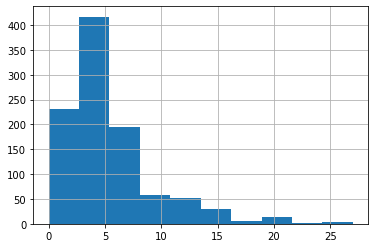

In [15]:
# Visualise the distribution of years in publishing
ukpub['Years in Publishing'].hist();

Here we can see that the values for years in publishing follow a somewhat normal distribution although it appears to be heavily right-skewed.

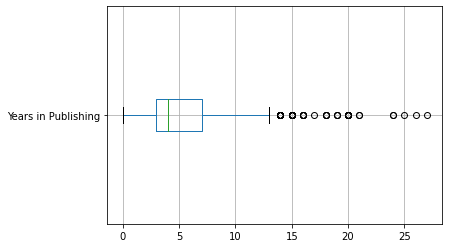

In [18]:
# Boxplot for years in publishing
ukpub.boxplot(column=['Years in Publishing'], vert=False);

We can see that we have some outliers towards the top end of the scale. This is not surprising given that the data  for years in publishing is positively skewed, however, we may have to remove some of these outliers before training our model.

In [19]:
# Descriptive statistics for years in publishing
ukpub[['Years in Publishing']].describe()

,Years in Publishing
count,1007.000000
mean,5.342602
std,4.129225
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,27.000000


In [20]:
# Due to the number of outliers we will fill the null values with median instad of mean
ukpub['Years in Publishing'].fillna(ukpub['Years in Publishing'].median(), inplace=True)

#### Gender Identity Column

In [21]:
# Check value counts of gender identity
ukpub['Gender Identity'].value_counts()

Woman (cisgender)                                                           884
Man (cisgender)                                                             110
Prefer not to say                                                            14
Non-binary                                                                    7
Woman (non-binary)                                                            2
https://unitetheunion.org/why-join/membership-types/unite-young-members/      1
White (Scandinavian immigrant)                                                1
Prefer to self-describe                                                       1
Name: Gender Identity, dtype: int64

Here we have a few strange values that we will need to deal with. From the Woman (non-binary) down, it is unclear what these people's Gender Identity is so we will have to filter them out.

In [22]:
# Filter out those groups which have an unknown gender identity
ukpub = ukpub.groupby('Gender Identity').filter(lambda x: len(x) > 5)

In [24]:
# Remove '(cisgender)' from 'Woman' and 'Man' to make values easier to read
ukpub.loc[ukpub['Gender Identity'] == 'Woman (cisgender)', 'Gender Identity'] = 'Woman'
ukpub.loc[ukpub['Gender Identity'] == 'Man (cisgender)', 'Gender Identity'] = 'Man'

#### Sexual Orientation Column

In [26]:
# Check values for sexual orientation
ukpub['Sexual Orientation'].value_counts(dropna=False)

Straight                                          733
Bisexual                                          109
Prefer not to say                                  53
Queer                                              32
Gay                                                22
Questioning                                        16
Lesbian                                            14
Pansexual                                          12
NaN                                                12
Asexual                                             9
no labels (not straight but sexuality is fake)      1
Demisexual                                          1
Asexual/Queer                                       1
Name: Sexual Orientation, dtype: int64

In [27]:
# Because straight is by far the most common value, we will fill all null values with straight
ukpub['Sexual Orientation'].fillna(ukpub['Sexual Orientation'].mode()[0], inplace=True)

In [28]:
# Group all non-straight into a single category to simplify
ukpub.loc[ukpub['Sexual Orientation'] != 'Straight', 'Sexual Orientation'] = 'LGBTQ'

#### Race/Ethnicity Column

In [29]:
# Check unique values for race and ethnicity
ukpub['Race / Ethnicity'].unique()

array(['White', 'Black african ', 'British Indian', 'White British',
       'British Indian ', 'White British ', 'White Australian',
       'Black Caribbean ', 'Pakistani', 'Caucasian ', 'Black British ',
       'Black', 'White/Irish', 'Caucasian', 'White ', 'Asian',
       'Caucasian / Greek', 'Chinese', 'White, British',
       'White (Not British)', 'White/irish', 'White/British',
       'British Asian', 'Mixed (White British and British Indian)',
       'Mixed', 'Black/African-British', 'White (other)',
       'Mixed race - White and East Asian', 'white', 'White European',
       'South Asian ', 'White/European', 'South Asian', 'white british',
       'Mixed white and asian', 'White british', 'Black British',
       'Mixed - White/Asian', 'South-Asian', 'white (other)',
       'Mixed (White and Asian)', 'Mixed Afro/Indo Caribbean and White',
       'White/Irish ', 'British Asian ', 'South Asian origin',
       'British Asian - Indian ', 'Black African ',
       'British Asian - Ind

It seems like what have a lot of variation in the Race/Ethnicity column. We will have to find a way of reducing down the number of values by accurately grouping people into larger categories.

In [30]:
# Look at most common entries for race/ethnicity
ukpub['Race / Ethnicity'].value_counts().head()

White British     347
White             273
White              37
White British      30
White European     17
Name: Race / Ethnicity, dtype: int64

In [31]:
# With White British being the most common value here, we will fill all null values with White British
ukpub['Race / Ethnicity'].fillna(ukpub['Race / Ethnicity'].mode()[0], inplace=True)

In [32]:
# Correct specific values before applying function
ukpub.loc[ukpub['Race / Ethnicity'] == 'Not white', 'Race / Ethnicity'] = 'Other'
ukpub.loc[ukpub['Race / Ethnicity'] == 'Whote', 'Race / Ethnicity'] = 'White'
ukpub.loc[ukpub['Race / Ethnicity'] == 'British Insian', 'Race / Ethnicity'] = 'British Indian'

In [33]:
# Function for simplifying race/ethnicity
def simplify_race(x):
    if 'mixed' in x.lower():
        return 'Mixed'
    elif 'black' in x.lower() or 'bame' in x.lower():
        return 'Black'
    elif 'asian' in x.lower() or 'chinese' in x.lower() or 'indian' in x.lower() or \
                                 'pakistani' in x.lower() or 'bangladeshi' in x.lower():
        return 'Asian'
    elif 'white' in x.lower() or 'caucasian' in x.lower():
        return 'White'
    else:
        return 'Unknown'

In [34]:
# Apply function to race/ethnicity column
ukpub['Race / Ethnicity'] = ukpub['Race / Ethnicity'].apply(simplify_race)

In [35]:
# Check number of unique values
ukpub['Race / Ethnicity'].nunique()

5

#### Employment Status Column

In [36]:
# Check unique values for employment status
ukpub['Employment Status'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Parental leave cover',
       'Part-Time (32 hours per week)',
       'full-time but no contract, paid hourly',
       "I have just left this job but feel it's important for it to be logged",
       'Left position in 2019 due to low salary',
       "Full Time but wasn't permanent - they made anyone who wasn't permanent take unpaid six week breaks before you reached two years and then would hire you again ",
       'Rolling temp contract', 'intern', 'Freelance'], dtype=object)

For employment status, we can group indivduals into either part-time, full-time, contract or other.

In [37]:
# Function for simplifying employment status
def simplify_employment_status(x):
    if 'part-time' in x.lower():
        return 'Part-time'
    elif 'full-time' in x.lower():
        return 'Full-time'
    elif 'contract' in x.lower():
        return 'Contract'
    else:
        return 'Other'

In [38]:
# Apply function
ukpub['Employment Status'] = ukpub['Employment Status'].apply(simplify_employment_status)

#### Salary Column

In [44]:
ukpub[['Salary']].head(10)

,Salary
0,£36k
1,"23,000 per annum"
2,"£23,000"
3,"£28,000"
4,£115 per day
5,"£21k starting, £27k 5 years later"
6,31000
7,"£25,000 entering in Sept 2016, £29,248.44 exit..."
8,25.5k
9,"£26,600"


For Salary, we can see that there is a lot of variation in the types of entries that people have made. Some salary entries contain quite a bit of textual information whereas many other entries are given in different formats. We will have to standardise all of these values if we want to do any further analysis. Specifically, we want to extract just the numerical yearly salary for each individual. This will be important when training our model.

Due to the large number of variation in how people have stated their salaries, I have decided to use regular expressions to attempt to parse out as much of the relevant numerical salary data as possible.

In [46]:
# Use a variety of regex expressions to extract correct salary values
def extract_salary(x):
    if re.search(r"^£\d+,[0-9]{3}.{0,21}$", x):
        return x.replace(',', '')[1:6]
    elif re.search(r"^£?\d\d[kK]\s?$", x): 
        return x[-3:-1] + "000"
    elif re.search(r"^\d+[,.\s]\s?0", x):
        return x[:2] + "000"
    elif re.search(r"^\d+[,.\s]\s?0{3}", x):
        return x[0:2] + "000"
    elif re.search("^£?\d{5}0?", x):
        x = x.strip('£')
        if '.' in x:
            return x[:5]
        else:
            return x.split(' ')[0]
    elif re.search(r"[kK]$", x):
        if '.' in x:
            return x.split('.')[0][-2:] + x.split('.')[1][0] + "00"
        elif '-' in x:
            return x.split('-')[1][:2] + "000"
        else:
            return x[-3:-1] + "000"
    else:
        return x

In [47]:
# Map function to each salary element
ukpub['Salary'] = ukpub['Salary'].map(extract_salary)

In [51]:
# Check some of the salary values
ukpub[['Salary']].head(10)

,Salary
0,36000
1,23000
2,23000
3,28000
4,£115 per day
5,"£21k starting, £27k 5 years later"
6,31000
7,"£25,000 entering in Sept 2016, £29,248.44 exit..."
8,25500
9,26600


It looks like we were able to extract many of the salary values using the regular expressions, but we can still see that there are some salaries that were not successfully extracted. As this is a small dataset, we can manually amend all of the remaining salary values.

In [52]:
# Correct salary values for those that were not captured by the regex expressions

# £115 per day --> (52(week)*5(work days) - 20(days holiday))*115(day rate)
ukpub.loc[ukpub['Salary'] == '£115 per day ', 'Salary'] = '27600'

# # £21k starting, £27k 5 years later 
ukpub.loc[ukpub['Salary'] == '£21k starting, £27k 5 years later ', 'Salary'] = '27000'

# £25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019
ukpub.loc[ukpub['Salary'] == '£25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019', 'Salary'] = '29248'

# £30,000 (as of 2020; started role in 2016)
ukpub.loc[ukpub['Salary'] == '£30,000 (as of 2020; started role in 2016)', 'Salary'] = '30000'

# 20k starting
ukpub.loc[ukpub['Salary'] == '20k starting', 'Salary'] = '20000'

# 34
ukpub.loc[ukpub['Salary'] == '34', 'Salary'] = '34000'

# 28.50£
ukpub.loc[ukpub['Salary'] == '28.50£', 'Salary'] = '28500'

# £25, 000
ukpub.loc[ukpub['Salary'] == '£25, 000', 'Salary'] = '25000'

# approx £11-13,000 p.a.
ukpub.loc[ukpub['Salary'] == 'approx £11-13,000 p.a.', 'Salary'] = '13000'

# £38.5k (increase to £40k delayed by covid)
ukpub.loc[ukpub['Salary'] == '£38.5k (increase to £40k delayed by covid)', 'Salary'] = '40000'

# 21.5
ukpub.loc[ukpub['Salary'] == '21.5', 'Salary'] = '21500'

# £24K annually 
ukpub.loc[ukpub['Salary'] == '£24K annually ', 'Salary'] = '24000'

# £18,000 (£19k after 6-month probation)
ukpub.loc[ukpub['Salary'] == '£18,000 (£19k after 6-month probation)', 'Salary'] = '19000'

# £23k to start rising to £23,500
ukpub.loc[ukpub['Salary'] == '£23k to start rising to £23,500', 'Salary'] = '23500'

# £26 266
ukpub.loc[ukpub['Salary'] == '£26 266', 'Salary'] = '26266'

# 28
ukpub.loc[ukpub['Salary'] == '28', 'Salary'] = '28000'

# £15.5k (2015), £16.9k (2016), £18.9k (2017)
ukpub.loc[ukpub['Salary'] == '£15.5k (2015), £16.9k (2016), £18.9k (2017)', 'Salary'] = '18900'

# £22,000 start, £24,000 2 years on
ukpub.loc[ukpub['Salary'] == '£22,000 start, £24,000 2 years on', 'Salary'] = '24000'

# 31'800
ukpub.loc[ukpub['Salary'] == "31'800", 'Salary'] = '31800'

# £38
ukpub.loc[ukpub['Salary'] == '£38', 'Salary'] = '38000'

# £28k pro rata
ukpub.loc[ukpub['Salary'] == '£28k pro rata', 'Salary'] = '28000'

# 34,850 (full time)
ukpub.loc[ukpub['Salary'] == '34,850 (full time)', 'Salary'] = '34850'

# 5k000
ukpub.loc[ukpub['Salary'] == '5k000', 'Salary'] = '50000'

# Started at £21500 but increased to £22500 after a year
ukpub.loc[ukpub['Salary'] == 'Started at £21500 but increased to £22500 after a year', 'Salary'] = '22500'

In [53]:
# Drop rows where people do not make a salary

# List of entries that indicate no salary
no_salary = ['Unpaid with £100/week stipend', '0']

# Find indexes of people with no salary
ppl_no_salary = ukpub[ukpub['Salary'].isin(no_salary)].index

# Remove people with no salary 
ukpub = ukpub[~ukpub.index.isin(ppl_no_salary)]

In [57]:
# With the salaries now standardised, we can convert them to numeric data type
ukpub['Salary'] = ukpub['Salary'].astype('int64')

In [60]:
# Check to see what our data now looks like after cleaning
ukpub.head(10)

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,36000,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,23000,Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,23000,Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,28000,Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,27600,Contract,Asian,Woman,Straight,7.0
5,Executive (marketing and operations),27000,Full-time,White,Woman,Straight,6.0
6,Project & Brand Exec,31000,Full-time,White,Woman,Straight,3.0
7,Coordinator (Creative Responsibility),29248,Full-time,White,Woman,Straight,3.0
8,Corporate responsibility assistant,25500,Full-time,Black,Woman,Straight,1.0
9,Press Officer,26600,Full-time,White,Woman,LGBTQ,4.0


Our data looks much cleaner and we can now proceed with the EDA.

### EDA

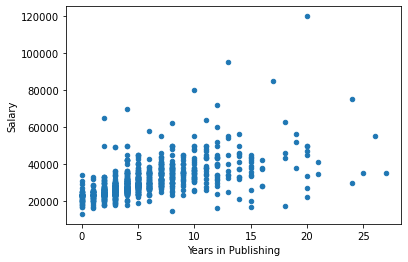

In [61]:
# Checking relationship between salary and years in publishing
ukpub.plot(kind='scatter', x='Years in Publishing', y='Salary');

We can see here that there does appear to be a relationship between years in publishing and salary however the data looks quite spread out, especially as the years in publishing increases. This could mean that a linear model is not the best model to use for this data. We can also see an outlier with a salary of £120,000 for 20 years in publishing. While this may be a plausible salary value, we will omit this individual when we remove outliers as it may negatively impact the results from our model.

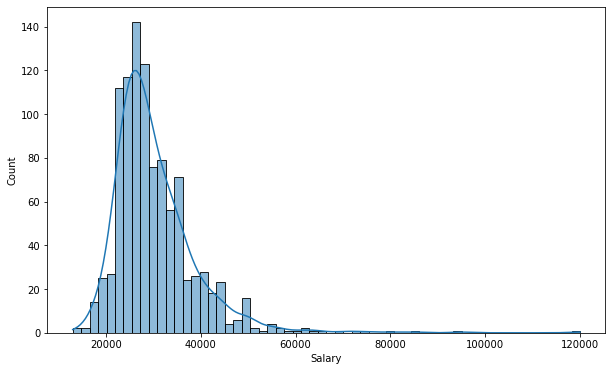

In [70]:
# Visualise distribution of salary
plt.figure(figsize=(10, 6))
sns.histplot(ukpub['Salary'], kde=True);

It appears that salary is somewhat normally distributed but also has positive skew, albeit not as much as years in publishing.

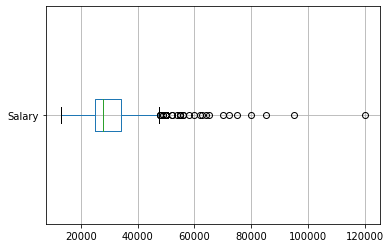

In [72]:
# Boxplot for salary
ukpub.boxplot(column = ['Salary'], vert=False);

As with years in publishing, we also have some outliers at the top end of our dependent variable (salary). 

We will remove the top and bottom .05% from salary and years in publishing so that the data better reflects the overall distribution.

In [74]:
# Remove some outliers for salary - removing top .05% and bottom .05%
ukpub = ukpub[(ukpub['Salary'] < ukpub['Salary'].quantile(.995)) & 
                         (ukpub['Salary'] > ukpub['Salary'].quantile(.005))]

# Remove some outliers here for years in publishing - removing top .05% and bottom .05%
ukpub = ukpub[(ukpub['Years in Publishing'] < ukpub['Years in Publishing'].quantile(.995)) & 
                         (ukpub['Years in Publishing'] > ukpub['Years in Publishing'].quantile(.005))]

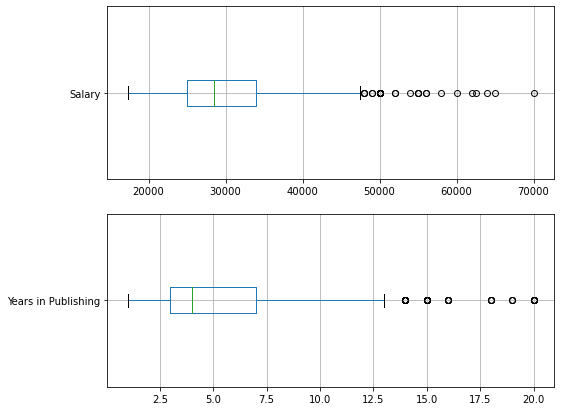

In [85]:
# Boxplots for salary and years in publishing with outliers removed
fig, axes = plt.subplots(2,1, figsize=(8,7))
ukpub.boxplot(column = ['Salary'], vert=False, ax=axes[0]);
ukpub.boxplot(column = ['Years in Publishing'], vert=False, ax=axes[1]);

This looks better. We still have outliers at the top end but because we have eliminated some of the higher values, the data now appears to be slightly better distributed. This will help when fitting the model to the data.

In [92]:
# Correlation between salary and years in publishing
ukpub.corr()

,Salary,Years in Publishing
Salary,1.000000,0.593085
Years in Publishing,0.593085,1.000000


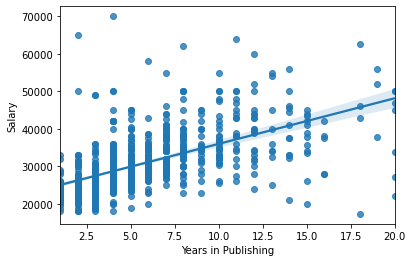

In [90]:
# Regplot showing the relationship between years in publishing and salary
sns.regplot(x='Years in Publishing', y='Salary', data=ukpub);

Again, we can see that although there does appear to be a positive relationship, there are a lot of data points that are not captured accurately by the regression line. This could mean that a linear model may not be the best model to explain the relationship between these two variables.

Chart for Employment Status | Total = 4


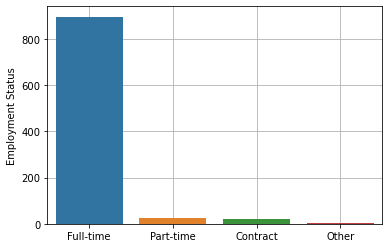

Chart for Race / Ethnicity | Total = 5


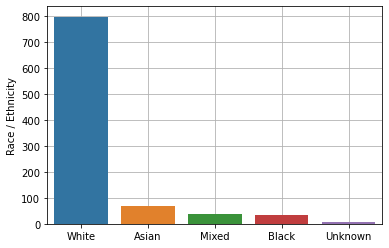

Chart for Gender Identity | Total = 4


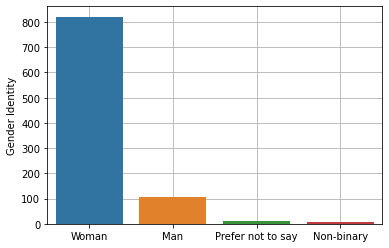

Chart for Sexual Orientation | Total = 2


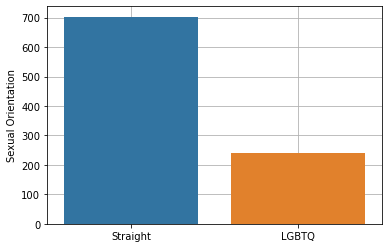

Chart for Years in Publishing | Total = 19


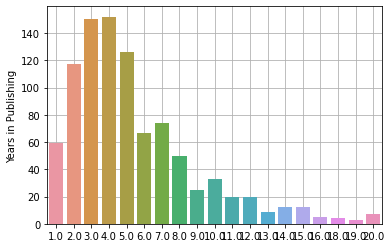

In [93]:
# Barplots for each of the features
for feature in ukpub.columns[2:7]:
    feature_num = ukpub[feature].value_counts()
    print(f"Chart for {feature} | Total = {len(feature_num)}")
    chart = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.grid()
    plt.show()

From these graphs, we can see that the majority of our dataset consists of straight, white women who work full-time and have been working in the publishing industry for between 2-5 years.

In [94]:
# Pivot table for average salary and average years in publishing for race/ethnicity
pd.pivot_table(ukpub, index='Race / Ethnicity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', 
    ascending=False)

,Salary,Years in Publishing
Race / Ethnicity,,
Unknown,33871.428571,8.285714
White,30634.086466,5.548872
Asian,29950.800000,4.700000
Mixed,29086.111111,5.333333
Black,26854.411765,3.617647


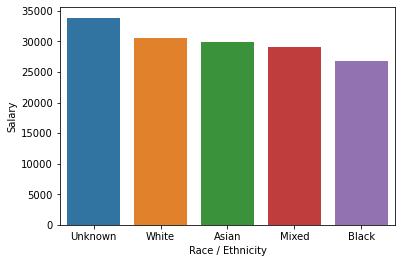

In [95]:
# Plot graph showing mean salary amount for Race / Ethnicity
race_salary = pd.pivot_table(ukpub, index='Race / Ethnicity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=race_salary.index, y="Salary", data=race_salary);

Interestingly, it appears that those whose race and ethnicity is unknown not only earn the highest salary on average but have also spent the most amount of years in publishing on average. This could mean that those in better paid positions who have worked in publishing for longer feel less inclined to share their race or ethnicity but this is just speculation.

In [97]:
# Pivot table for average salary and average years in publishing for gender identity
pd.pivot_table(ukpub, index='Gender Identity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False)

,Salary,Years in Publishing
Gender Identity,,
Man,30597.066038,5.943396
Prefer not to say,30509.090909,6.909091
Woman,30390.886724,5.342266
Non-binary,30000.000000,5.428571


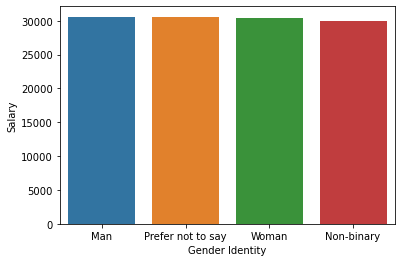

In [98]:
# Plot graph showing mean salary amount for Gender Identity
gender_salary = pd.pivot_table(ukpub, index='Gender Identity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=gender_salary.index, y="Salary", data=gender_salary);

Here we can see that on average, all genders earn roughly equal salaries.

In [100]:
# Pivot table for average salary and average years in publishing for sexual orientation
pd.pivot_table(ukpub, index='Sexual Orientation', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False)

,Salary,Years in Publishing
Sexual Orientation,,
Straight,30692.786629,5.509246
LGBTQ,29598.256198,5.194215


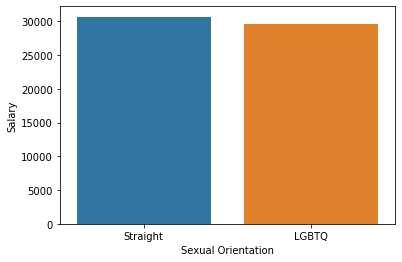

In [101]:
# Plot graph showing mean salary amount for Sexual Orientation
sexori_salary = pd.pivot_table(ukpub, index='Sexual Orientation', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=sexori_salary.index, y="Salary", data=sexori_salary);

Similarly, it appears that on average, people of different sexual orientation earn roughly equal salaries.

In [102]:
# Pivot table for average salary and average years in publishing for sexual orientation
pd.pivot_table(ukpub, index='Years in Publishing', 
                       values=['Salary']).sort_index().head()

,Salary
Years in Publishing,
1.0,23681.508475
2.0,25418.247863
3.0,26261.206667
4.0,29266.782895
5.0,30315.476190


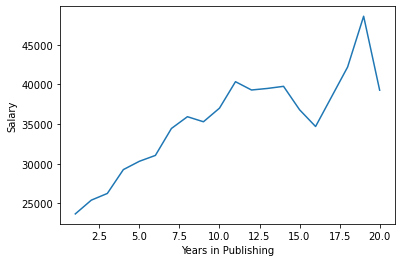

In [103]:
# Plot graph showing mean salary amount for Each year or Years in Publishing
yip_salary = pd.pivot_table(ukpub, index='Years in Publishing', values='Salary').sort_values('Salary', ascending=False)
sns.lineplot(x=yip_salary.index, y="Salary", data=yip_salary);

Here we can see that after around the 15 year mark for years in publishing, the linear relationship starts to break down and becomes more unstable. This is consistent to what we saw in our regression plot earlier. This could mean that there is steady career progression up until around 15 years in the industry at which point people either take a lower paid role or a much higher paid role. However, we also have to remember that there may also be macroeconomic factors, such as financial crises, that may explain this pattern. 

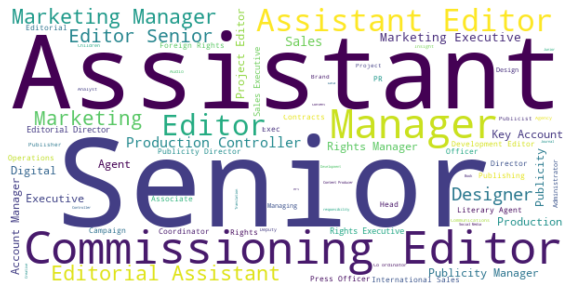

In [104]:
# Word Cloud for Job Titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Set up text
text = " ".join(title for title in ukpub['Job Title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, random_state=21, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud of job titles, it appears that people mostly occupy either assistant or senior positions, however, as this is a small dataset, it could just be that this is only reflective of the small sample size.

### Model Building

#### Using sklearn

In [ ]:
# Top 0.05% and bottom 0.05% removed
uk_pub_final = uk_pub_outliers.drop(['Job Title'], axis=1)

In [ ]:
# Only top 0.05% removed
uk_pub_final2 = uk_pub_outliers2.drop(['Job Title'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
# Simple linear regression
X1 = uk_pub_final['Years in Publishing'].values.reshape(-1,1)
y1 = uk_pub_final['Salary'].values.reshape(-1,1)

X1b = uk_pub_final2['Years in Publishing'].values.reshape(-1,1)
y1b = uk_pub_final2['Salary'].values.reshape(-1,1)

In [ ]:
# Create train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.2, random_state=0)

In [ ]:
# Create model and fit to the training data
reg = LinearRegression()
reg.fit(X_train1, y_train1)
print(reg.score(X_train1, y_train1))
print(reg.coef_)
y_hat1 = reg.predict(X_train1)
print()
regb = LinearRegression()
regb.fit(X_train1b, y_train1b)
print(regb.score(X_train1b, y_train1b))
print(regb.coef_)
y_hat1b = regb.predict(X_train1b)

In [ ]:
# Plot results for predictions of training data
plt.scatter(X_train1, y_train1)
plt.plot(X_train1, y_hat1, linewidth=4, color='red')
plt.show()

In [ ]:
# Plot results for predictions of training data - uk_pub_final2
plt.scatter(X_train1b, y_train1b, color='grey')
plt.plot(X_train1b, y_hat1b, linewidth=4, color='green')
plt.show()

In [ ]:
# Plot results for predictions of test data
y_hat_test1 = reg.predict(X_test1)
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_hat_test1, linewidth=4, color='red')
plt.show()

In [ ]:
# Plot results for predictions of test data - uk_pub_final2
y_hat_test1b = regb.predict(X_test1b)
plt.scatter(X_test1b, y_test1b, color='grey')
plt.plot(X_test1b, y_hat_test1b, linewidth=4, color='green')
plt.show()

In [ ]:
# Checking the residual errors of the model
mae = mean_absolute_error(y_hat_test1, y_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1, y_test1))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

In [ ]:
# Check mean of residuals - May not need this
residuals = y_test_1.values-y_hat_test_1
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

In [ ]:
# Plot residual errors - might need to do this on sklearn model - may not need this
resid = y_test_1 - y_hat_test_1
resid = pd.Series(resid)
plt.scatter(y_hat_test_1, resid)
plt.hlines(0)

In [ ]:
# Checking the model's normality of residuals (Q-Q Plot) - might not need this
from scipy import stats
stats.probplot(reg.resid, dist="norm", plot=plt)
plt.title("Model Residuals Q-Q Plot")

In [ ]:
# Checking for homoscedasticity
sns.scatterplot(y_hat_test_1,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# Check for normality of error terms/residuals
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')

#### Using statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
# Separate independent and dependent variable
X1b = uk_pub_final['Years in Publishing']
y1b = uk_pub_final['Salary']

In [ ]:
# Add constant
X1b = add_constant(X1b)

In [ ]:
# Create train/test split
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.2, random_state=0)

In [ ]:
# Create and fit sm model
reg_sm1b = sm.OLS(y_train1b, X_train1b).fit()
print(reg_sm1b.summary())

In [ ]:
# Multiple Linear Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Separate independent variables from dependent variables
X2 = uk_pub_final.drop(['Salary'], axis=1)
y2 = uk_pub_final['Salary']

In [ ]:
# Create dummy variables for categorical columns (automatically detects categorical variables)
X2 = pd.get_dummies(X2, drop_first=True)

# # or you can state explicitly which columns to create dummies from
# dummy_cols = ['Employment Status', 'Race / Ethnicity', 'Gender Identity', 'Sexual Orientation']
# X2 = pd.get_dummies(X2, columns=dummy_cols, drop_first=True)

# Add constant
X2 = add_constant(X2)

In [ ]:
# Check VIF for determing if we have multicollinearity amongst the independent variables
vif = pd.DataFrame()
vif["Features"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

In [ ]:
# Create train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
# Create and fit sm model
reg_sm2 = sm.OLS(y_train2, X_train2).fit()
print(reg_sm2.summary())

In [ ]:
# Run again removing the features that were not significant
not_significant = [
    'Employment Status_Full-time',
    'Employment Status_Other',
    'Race / Ethnicity_Black',
    'Race / Ethnicity_Mixed',
    'Race / Ethnicity_Unknown',
    'Race / Ethnicity_White',
    'Gender Identity_Non-binary',
    'Gender Identity_Prefer not to say',
    'Gender Identity_Woman',
    'Sexual Orientation_Straight',
]
X3 = X2.drop(not_significant, axis=1)
y3 = uk_pub_final['Salary']

In [ ]:
# Check VIF for determing if we have multicollinearity amongst the independent variables
vif = pd.DataFrame()
vif["Features"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif

# Or create VIF dataframe like this
# pd.DataFrame([variance_inflation_factor(X.values, i) 
#                for i in range(X.shape[1])], 
#                index=X.columns, columns=['VIF'])

In [ ]:
# Create train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [ ]:
# Create and fit sm model
reg_sm3 = sm.OLS(y_train3, X_train3).fit()
print(reg_sm3.summary())

In [ ]:
# Checking the model's normality of residuals (Q-Q Plot) - might not need this
from scipy import stats
stats.probplot(regsm3.resid, dist="norm", plot=plt)
plt.title("Model Residuals Q-Q Plot")

In [ ]:
# Create prediction using model and analyse residual error
y_hat3 = reg_sm3.predict(X_test3)
rmse3 = math.sqrt(mean_squared_error(y_hat3, y_test3))
print(f'RMSE: {rmse3}')
plt.scatter(y_hat3, y_test3);

In [ ]:
# 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
X4 = X3.copy()
y4 = y3.copy()

In [ ]:
# Create model and run cross validation
reg4 = LinearRegression()
scores = cross_val_score(reg4, X4, y4, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(np.abs(scores)))

In [ ]:
# Run cross validation using shuffled sets
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores2 = cross_val_score(reg4, X4, y4, cv=cv, scoring='neg_mean_squared_error')
np.mean(np.sqrt(np.abs(scores2)))

#### Model write up

Multiple regression analysis was used to test if age, BMI, sex (female), smoking status, number of children, and region significantly predicted the cost of insurance premiums. The results of the regression indicated the nine predictors explained 75.1% of the variance (R2= 0.75, F(8,1329)= 298.4, p< 0.01). The predicted insurance premium charge is equal to -12,070 + 256.86(age) + 339.19(bmi) + 131.31(sex_female) + 23,850(smoker_yes) + 474.50(number of children) – 352.96(region_northwest) – 1,035.02(region_southeast) – 960.05(region_soughtwest), where sex_female is coded as 1= female, 0= male; smoker_yes is coded as 1= smoker, 0= non-smoker; region_[location] is coded as 1= in region, 0= not in region. All of the independent variables used in the model were significant predictors of insurance premium charge, except for sex